In [15]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from useducation',con=engine)

# No need for an open connection, as we're only doing a single query
engine.dispose()

In [3]:
education_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [4]:
# Replace missing values with mean of values from same state, if possible.
# Otherwise,replace with mean of given variable.
education_df4 = education_df.copy()

columns = ['ENROLL', 'TOTAL_REVENUE', 'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE', 'TOTAL_EXPENDITURE',
           'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
           'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G', 'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 
           'GRADES_1_8_G', 'GRADES_9_12_G', 'GRADES_ALL_G']

for column in columns:
    education_df4[column] = round(education_df4[column].fillna(education_df4.groupby('STATE')[column].transform
    ('mean')), 0)
    education_df4[column] = round(education_df4[column].fillna(education_df4[column].mean()), 0)

In [5]:
# Check that missing values were filled in
education_df4.isnull().sum() / education_df4.isnull().count() * 100

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                           0.000000
TOTAL_REVENUE                    0.000000
FEDERAL_REVENUE                  0.000000
STATE_REVENUE                    0.000000
LOCAL_REVENUE                    0.000000
TOTAL_EXPENDITURE                0.000000
INSTRUCTION_EXPENDITURE          0.000000
SUPPORT_SERVICES_EXPENDITURE     0.000000
OTHER_EXPENDITURE                0.000000
CAPITAL_OUTLAY_EXPENDITURE       0.000000
GRADES_PK_G                      0.000000
GRADES_KG_G                      0.000000
GRADES_4_G                       0.000000
GRADES_8_G                       0.000000
GRADES_12_G                      0.000000
GRADES_1_8_G                     0.000000
GRADES_9_12_G                    0.000000
GRADES_ALL_G                     0.000000
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

Don't forget to apply the most suitable missing value filling techniques from the previous checkpoint to the data. Provide the answers to the following only after you've addressed missing values!

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

1. Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

2. If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.

3. Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.

4. Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.

5. Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?

6. If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?

## 1. Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

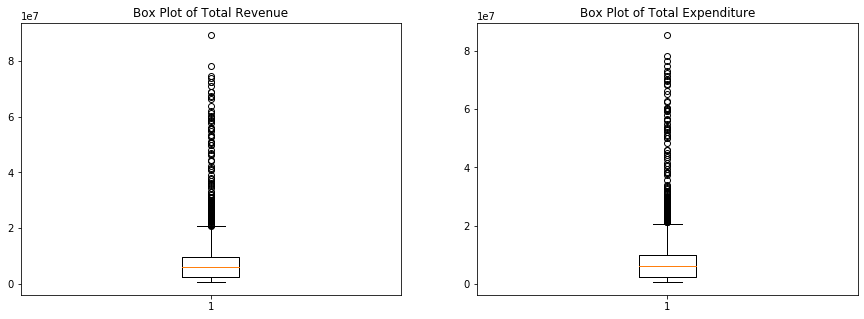

In [13]:
# Box plots for TOTAL_REVENUE and TOTAL_EXPENDITURE
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.boxplot(education_df4['TOTAL_REVENUE'])
plt.title('Box Plot of Total Revenue')


plt.subplot(1, 2, 2)
plt.boxplot(education_df4['TOTAL_EXPENDITURE'])
plt.title('Box Plot of Total Expenditure')

plt.show()

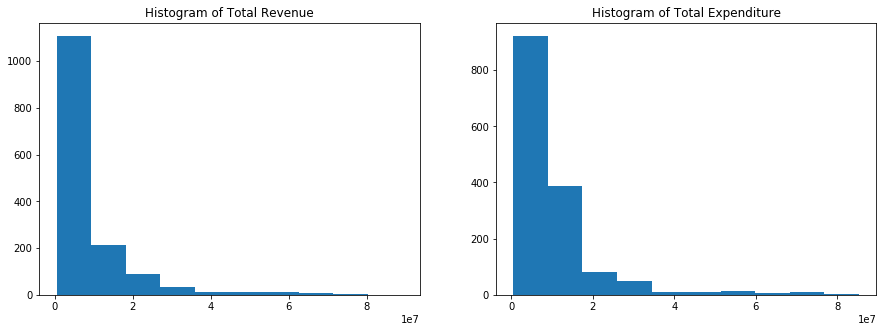

In [14]:
# Histograms for TOTAL_REVENUE and TOTAL_EXPENDITURE
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.hist(education_df4['TOTAL_REVENUE'])
plt.title('Histogram of Total Revenue')

plt.subplot(1, 2, 2)
plt.hist(education_df4['TOTAL_EXPENDITURE'])
plt.title('Histogram of Total Expenditure')

plt.show()

In [19]:
# Calculate the Z-scores for TOTAL_REVENUE using SciPy zscore() function and
#determine outliers by setting the threshold to 1, 2, and 3

z_revenue = zscore(education_df4['TOTAL_REVENUE'])

for threshold in range(1, 4):
    print('The score threshold is: {}'.format(threshold))
    print('Number of outliers is: {}\n'.format(len((np.where(z_revenue > threshold)[0]))))

The score threshold is: 1
Number of outliers is: 144

The score threshold is: 2
Number of outliers is: 58

The score threshold is: 3
Number of outliers is: 41



In [29]:
# Calculate the Z-scores for TOTAL_EXPENDITURE using SciPy zscore() function and
#determine outliers by setting the threshold to 1, 2, and 3
z_expenditure = zscore(education_df4['TOTAL_EXPENDITURE'])

for threshold in range(1, 4):
    print('The score threshold is: {}'.format(threshold))
    print('Number of outliers is: {}\n'.format(len((np.where(z_expenditure > threshold)[0]))))

The score threshold is: 1
Number of outliers is: 146

The score threshold is: 2
Number of outliers is: 59

The score threshold is: 3
Number of outliers is: 42



In [26]:
# Use 1, 2, and 3 as the threshold values in Tukey's method for TOTAL_REVENUE
q75, q25 = np.percentile(education_df4['TOTAL_REVENUE'], [75, 25])
iqr = q75 - q25

for threshold in range(1, 4):
    min_val = q25 - (iqr * threshold)
    max_val = q75 + (iqr * threshold)
    print('The score threshold is: {}'.format(threshold))
    print('Number of outliers is: {}\n'.format(
        len((np.where((education_df4['TOTAL_REVENUE'] > max_val)
        | (education_df4['TOTAL_REVENUE'] < min_val))[0]))
    ))

The score threshold is: 1
Number of outliers is: 191

The score threshold is: 2
Number of outliers is: 108

The score threshold is: 3
Number of outliers is: 57



In [28]:
# Use 1, 2, and 3 as the threshold values in Tukey's method for TOTAL_EXPENDITURE
q75, q25 = np.percentile(education_df4['TOTAL_EXPENDITURE'], [75, 25])
iqr = q75 - q25

for threshold in range(1, 4):
    min_val = q25 - (iqr * threshold)
    max_val = q75 + (iqr * threshold)
    print('The score threshold is: {}'.format(threshold))
    print('Number of outliers is: {}\n'.format(
        len((np.where((education_df4['TOTAL_EXPENDITURE'] > max_val)
        | (education_df4['TOTAL_EXPENDITURE'] < min_val))[0]))
    ))

The score threshold is: 1
Number of outliers is: 190

The score threshold is: 2
Number of outliers is: 109

The score threshold is: 3
Number of outliers is: 58



## 2. If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.

In [30]:
# Apply one-way winsorization to the highest end of the value distribution.
# Set the values of the outliers to the value of the 90th percentile.
winsorized_revenue = winsorize(education_df4["TOTAL_REVENUE"], (0, 0.10))
winsorized_revenue

winsorized_expenditure = winsorize(education_df4["TOTAL_EXPENDITURE"], (0, 0.10))
winsorized_expenditure

masked_array(data=[2653798.,  972488., 3401580., ..., 2670432., 8995489.,
                   1152672.],
             mask=False,
       fill_value=1e+20)

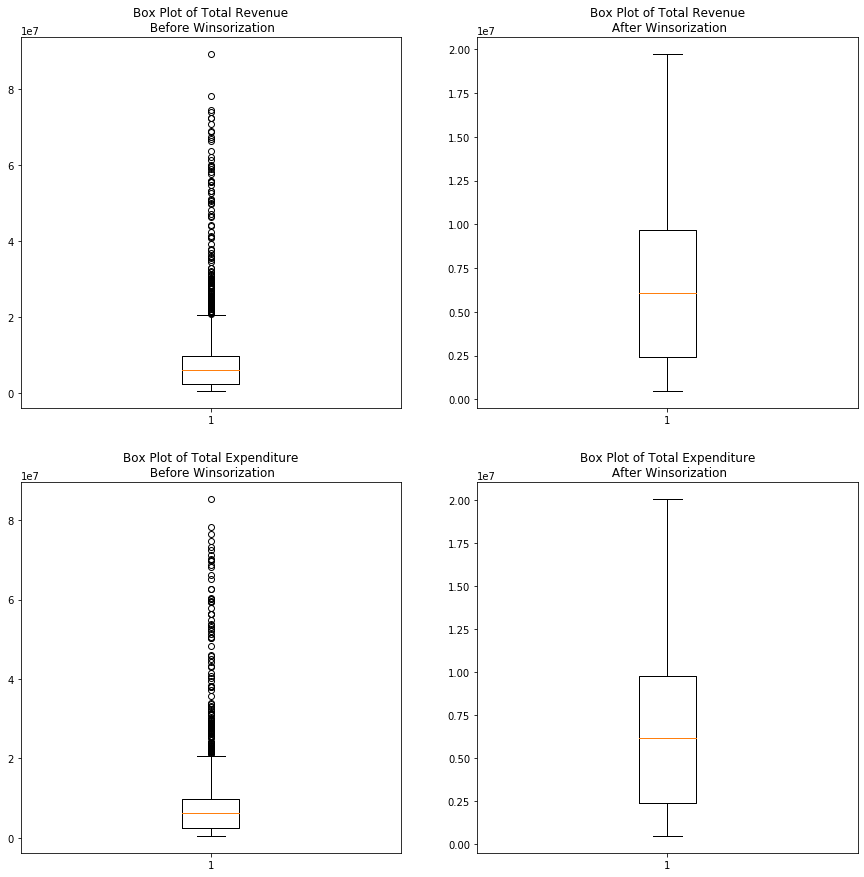

In [34]:
# Box plots of TOTAL_REVENUE and TOTAL_EXPENDITURE before and after winsorization
plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
plt.boxplot(education_df4['TOTAL_REVENUE'])
plt.title('Box Plot of Total Revenue\n Before Winsorization')

plt.subplot(2, 2, 2)
plt.boxplot(winsorized_revenue)
plt.title('Box Plot of Total Revenue\n After Winsorization')

plt.subplot(2, 2, 3)
plt.boxplot(education_df4['TOTAL_EXPENDITURE'])
plt.title('Box Plot of Total Expenditure\n Before Winsorization')

plt.subplot(2, 2, 4)
plt.boxplot(winsorized_expenditure)
plt.title('Box Plot of Total Expenditure\n After Winsorization')

plt.show()


## 3. Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.

In [36]:
# Create new variable called BUDGET_DEFICIT by subtracting the original
# TOTAL_EXPENDITURE from TOTAL_REVENUE
education_df4['BUDGET_DEFICIT'] = education_df4['TOTAL_REVENUE'] - education_df4['TOTAL_EXPENDITURE']

education_df4.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,BUDGET_DEFICIT
0,1992_ALABAMA,ALABAMA,1992,736584.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN,25087.0
1,1992_ALASKA,ALASKA,1992,130430.0,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712,77103.0
2,1992_ARIZONA,ARIZONA,1992,874322.0,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895,-143501.0
3,1992_ARKANSAS,ARKANSAS,1992,451902.0,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665,-31063.0
4,1992_CALIFORNIA,CALIFORNIA,1992,5945343.0,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN,-878807.0


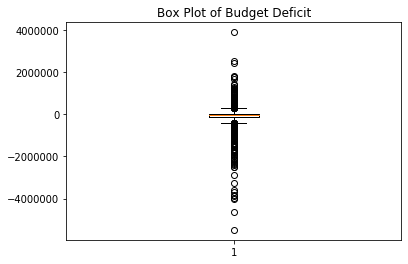

In [38]:
# Box plot of BUDGET_DEFICIT
plt.boxplot(education_df4['BUDGET_DEFICIT'])
plt.title('Box Plot of Budget Deficit')

plt.show()

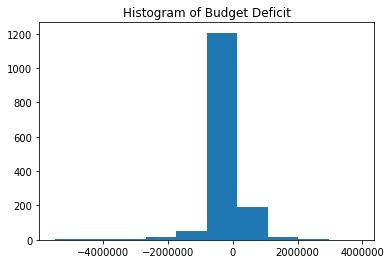

In [40]:
# Histogram of BUDGET_DEFICIT
plt.hist(education_df4['BUDGET_DEFICIT'])
plt.title('Histogram of Budget Deficit')

plt.show()

In [44]:
# Calculate the Z-scores for BUDGET_DEFICIT using SciPy zscore() function and
# determine outliers by setting the threshold to 1, 2, and 3

z_deficit = zscore(education_df4['BUDGET_DEFICIT'])

for threshold in range(1, 4):
    print('The score threshold is: {}'.format(threshold))
    print('Number of outliers is: {}\n'.format(len((np.where(z_deficit > threshold)[0]))))

The score threshold is: 1
Number of outliers is: 75

The score threshold is: 2
Number of outliers is: 22

The score threshold is: 3
Number of outliers is: 7



In [45]:
# Use 1, 2, and 3 as the threshold values in Tukey's method for BUDGET_DEFICIT
q75, q25 = np.percentile(education_df4['BUDGET_DEFICIT'], [75, 25])
iqr = q75 - q25

for threshold in range(1, 4):
    min_val = q25 - (iqr * threshold)
    max_val = q75 + (iqr * threshold)
    print('The score threshold is: {}'.format(threshold))
    print('Number of outliers is: {}\n'.format(
        len((np.where((education_df4['BUDGET_DEFICIT'] > max_val)
        | (education_df4['BUDGET_DEFICIT'] < min_val))[0]))
    ))

The score threshold is: 1
Number of outliers is: 342

The score threshold is: 2
Number of outliers is: 213

The score threshold is: 3
Number of outliers is: 131



In [83]:
# Apply two-way winsorization to the highest and lowest ends of the value distribution.
# Set the values of the outliers to the value of the 15th and 90th percentiles.
winsorized_deficit = winsorize(education_df4["BUDGET_DEFICIT"], (0.15, 0.1))
winsorized_deficit

masked_array(data=[  25087.,   77103., -143501., ...,   -6013.,  -50642.,
                     21281.],
             mask=False,
       fill_value=1e+20)

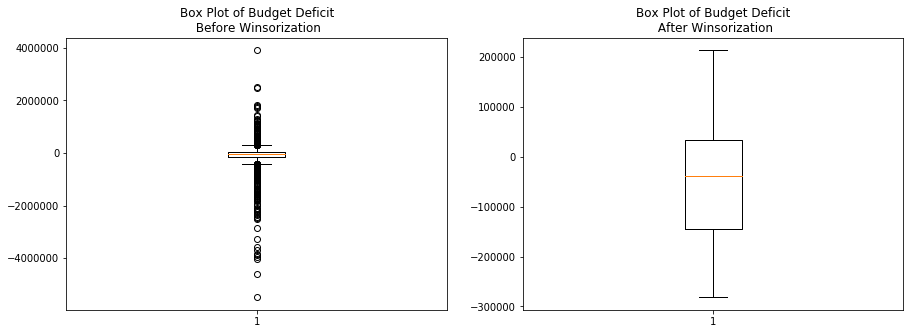

In [84]:
# Box plots of BUDGET_DEFICIT before and after winsorization
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(education_df4['BUDGET_DEFICIT'])
plt.title('Box Plot of Budget Deficit\n Before Winsorization')

plt.subplot(1, 2, 2)
plt.boxplot(winsorized_deficit)
plt.title('Box Plot of Budget Deficit\n After Winsorization')

plt.show()

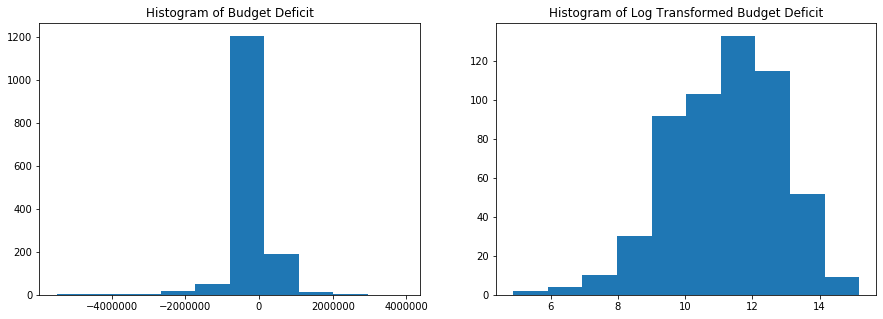

In [64]:
# Histogram of BUDGET_DEFICIT before and after log transformation
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(education_df4['BUDGET_DEFICIT'])
plt.title('Histogram of Budget Deficit')

plt.subplot(1,2,2)
plt.hist(np.log(education_df4['BUDGET_DEFICIT']))
plt.title('Histogram of Log Transformed Budget Deficit')

plt.show()

In [66]:
# Calculate the Z-scores for log transformed BUDGET_DEFICIT using SciPy
# zscore() function and determine outliers by setting the threshold to 1,
# 2, and 3

z_deficit = zscore(np.log(education_df4['BUDGET_DEFICIT']))

for threshold in range(1, 4):
    print('The score threshold is: {}'.format(threshold))
    print('Number of outliers is: {}\n'.format(len((np.where(z_deficit > threshold)[0]))))

The score threshold is: 1
Number of outliers is: 0

The score threshold is: 2
Number of outliers is: 0

The score threshold is: 3
Number of outliers is: 0



In [65]:
# Use 1, 2, and 3 as the threshold values in Tukey's method for log
# transformed BUDGET_DEFICIT
q75, q25 = np.percentile(np.log(education_df4['BUDGET_DEFICIT']), [75, 25])
iqr = q75 - q25

for threshold in range(1, 4):
    min_val = q25 - (iqr * threshold)
    max_val = q75 + (iqr * threshold)
    print('The score threshold is: {}'.format(threshold))
    print('Number of outliers is: {}\n'.format(
        len((np.where((np.log(education_df4['BUDGET_DEFICIT']) > max_val)
        | (np.log(education_df4['BUDGET_DEFICIT']) < min_val))[0]))
    ))

The score threshold is: 1
Number of outliers is: 0

The score threshold is: 2
Number of outliers is: 0

The score threshold is: 3
Number of outliers is: 0



## 4. Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.

In [67]:
# Subtract outlier eliminated version of TOTAL_EXPENDITURE from 
# outlier eliminated version of TOTAL_REVENUE
budget_deficit = winsorized_revenue - winsorized_expenditure

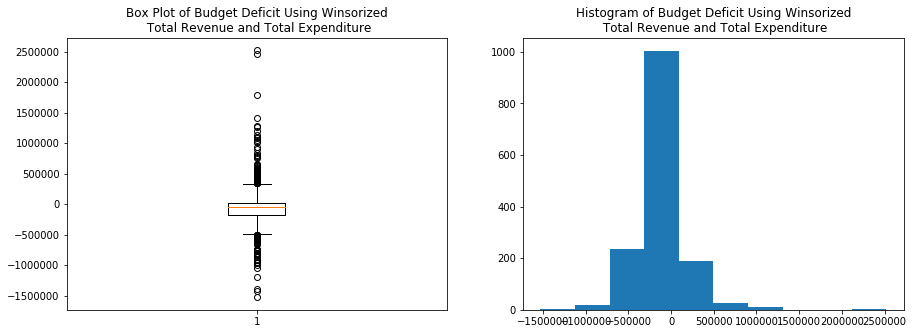

In [74]:
# Box plot and histogram of budget_deficit
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(budget_deficit)
plt.title('Box Plot of Budget Deficit Using Winsorized\n Total Revenue and Total Expenditure')

plt.subplot(1, 2, 2)
plt.hist(budget_deficit)
plt.title('Histogram of Budget Deficit Using Winsorized\n Total Revenue and Total Expenditure')

plt.show()

In [87]:
# Use winsorization method to eliminate outliers from budget_deficit
# Set the values of the outliers to the value of the 15th and 90th percentiles.
winsorized_deficit2 = winsorize(budget_deficit, (0.15, 0.1))
winsorized_deficit2

masked_array(data=[  25087.,   77103., -143501., ...,   -6013.,  -50642.,
                     21281.],
             mask=False,
       fill_value=1e+20)

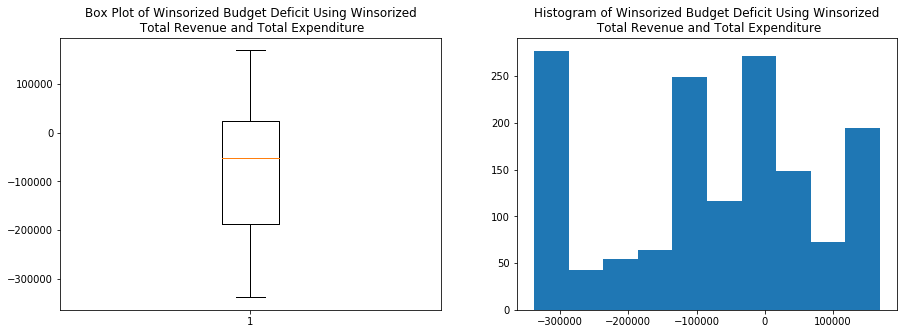

In [88]:
# Box plot and histogram of winsorized_deficit2
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(winsorized_deficit2)
plt.title('Box Plot of Winsorized Budget Deficit Using Winsorized\n Total Revenue and Total Expenditure')

plt.subplot(1, 2, 2)
plt.hist(winsorized_deficit2)
plt.title('Histogram of Winsorized Budget Deficit Using Winsorized\n Total Revenue and Total Expenditure')

plt.show()

## 5. Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?

In [92]:
# Descriptive statistics from 3 and 4
pd.DataFrame({"deficit_3": winsorized_deficit, "deficit_4": winsorized_deficit2}).describe()

,deficit_3,deficit_4
count,1492.000000,1492.000000
mean,-50334.732574,-78435.221850
std,151584.892863,160020.125732
min,-282001.000000,-337988.000000
25%,-144082.750000,-186578.000000
50%,-37975.500000,-53182.000000
75%,33539.750000,22674.000000
max,213545.000000,168446.000000


## 6. If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question? 

The method in the 3rd question is better because it calculates the budget deficit from the original data rather than from two outlier modified variables.